# Cleverly Challenge - Part 1

## Objective

Using the Amazon product reviews dataset from http://jmcauley.ucsd.edu/data/amazon/

1. Analyze the dataset
>* Is there a correlation between the rating of the product and the helpfulness of the
review?
>* Who are the most helpful reviewers?
>* Have reviews been getting more or less helpful over time?
2. Modelling
>* Build a model to predict the helpfulness of a review
>* How would you evaluate this model?
>* Please list some ideas which you would explore to improve the model if you had more
time
3. Bonus question
>* Check out the ​BERT model architecture​. Would you use it to build a new model to
predict the helpfulness of a review?
>* How do you expect that this new model’s performance compare with the previous one
(from Exercise 2)? What makes the BERT model better/worse?

__<center>Attribute Information</center>__

| Field | Description |
| --- | --- | 
| reviewerID | ID of the reviewer, e.g. A2SUAM1J3GNN3B |
| asin | ID of the product, e.g. 0000013714 |
| reviewerName | name of the reviewer |
| helpful | helpfulness rating of the review, e.g. 2/3 |
| reviewText | text of the review |
| overall | rating of the product |
| summary | summary of the review |
| unixReviewTime | time of the review (unix time) |
| reviewTime | time of the review (raw) |


## 1. import libraries and dataset

In [180]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import itertools
import datetime
import re

In [15]:
df = pd.read_csv('Clothing_Shoes_and_Jewelry_5.csv', parse_dates=["reviewTime"])

In [16]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0000031887,"[0, 0]",5,This is a great tutu and at a really great pri...,2011-02-12,A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800
1,0000031887,"[0, 0]",5,I bought this for my 4 yr old daughter for dan...,2013-01-19,A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600
2,0000031887,"[0, 0]",5,What can I say... my daughters have it in oran...,2013-01-04,A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600
3,0000031887,"[0, 0]",5,"We bought several tutus at once, and they are ...",2014-04-27,A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800
4,0000031887,"[0, 0]",5,Thank you Halo Heaven great product for Little...,2014-03-15,A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600


In [17]:
df.describe(include="all")

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
count,278677,278677,278677.000000,278653,278677,278677,278208,278676,2.786770e+05
unique,23033,974,NaN,278525,2691,39387,34444,179836,NaN
top,B005LERHD8,"[0, 0]",NaN,Love it,2013-12-26 00:00:00,A2J4XMWKR8PPD0,Amazon Customer,Nice,NaN
freq,441,191656,NaN,11,918,136,4001,1113,NaN
first,NaN,NaN,NaN,NaN,2003-03-29 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2014-07-23 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.245133,NaN,NaN,NaN,NaN,NaN,1.374197e+09
std,NaN,NaN,1.103747,NaN,NaN,NaN,NaN,NaN,2.904510e+07
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.048896e+09
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,1.362787e+09


In [18]:
#check for missing values
print(df.isnull().sum())

asin                0
helpful             0
overall             0
reviewText         24
reviewTime          0
reviewerID          0
reviewerName      469
summary             1
unixReviewTime      0
dtype: int64


In [19]:
df[df.reviewText.isnull()]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
1806,B0000ATP8L,"[0, 0]",5,NaN,2014-06-28,A21OBYW0N5ENS7,"Bassocantor "" OracleMagician""",&#8730; 20 YEARS and Still Going Strong!,1403913600
9827,B00074KYC8,"[70, 70]",4,NaN,2012-02-02,A2P4DZ9LG66F7M,jcazz,"Very nice watch, looks great, wears well!",1328140800
12528,B0007XA0FU,"[4, 4]",2,NaN,2013-09-28,A6SNEHZIBFK4V,Living Life In The Midwest,Ruined a classic by changing the design.,1380326400
15292,B0009HAIGK,"[1, 1]",5,NaN,2013-12-27,A2KW2LCO5QUWOI,"Jerrod Kowalski ""Jerrod Kowalski""",2XL for size 13 cross-trainer shoes,1388102400
17610,B000AOMDFG,"[2, 43]",5,NaN,2010-07-10,A2T0QHP0GKI4KG,"Estina ""Estina Anghel""",Love This Product,1278720000
24830,B000FL1M1K,"[0, 0]",5,NaN,2013-04-05,A1H3D6C2VBGOOZ,Shopper playgirl,Jackie O glasses at a low cost,1365120000
25896,B000GAYQJ0,"[34, 35]",5,NaN,2012-11-07,A2I6GCGJD0Q6PY,H. Stevens,how to adust the buckle on the Casio A158W-1,1352246400
28236,B000H92UKM,"[43, 47]",5,NaN,2013-05-12,AERTVDQPAD7WC,"William Doerner ""Will""",Who makes a video for shoe trees??,1368316800
31232,B000K2J4R8,"[0, 0]",5,NaN,2014-06-12,AT1YZX8OLUEWX,pampaints,"soft, cozy and warm - but it's teal.",1402531200
35324,B000N40W9W,"[0, 0]",5,NaN,2013-12-26,A2RM5ZSZJQL7WY,Susan E Crangle,Fantastic and educational,1388016000


__comment__
The above observations with empty review text often have non blank helpful votes. Perhaps the review text were lost, or perhaps there were accompanied with images. The "Summary" text appear to be quite short in general and do not provide sufficient information. Therefore we decide to remove these entries from the dataset as it could be misleading.

In [21]:
print(df.shape)
df = df[df.reviewText.isnull() == False]
print(df.shape)

(278677, 9)
(278653, 9)


In [22]:
df[df.summary.isnull()]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
124633,B004DKPETU,"[0, 0]",3,Returned the shoes they were to small. Seemed...,2013-03-15,A2NW4O9BJLWDDY,"Sgt Press ""Esipress""",NaN,1363305600


## 2. Data Cleansing and Create New Fields

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278653 entries, 0 to 278676
Data columns (total 9 columns):
asin              278653 non-null object
helpful           278653 non-null object
overall           278653 non-null int64
reviewText        278653 non-null object
reviewTime        278653 non-null datetime64[ns]
reviewerID        278653 non-null object
reviewerName      278184 non-null object
summary           278652 non-null object
unixReviewTime    278653 non-null int64
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 21.3+ MB


In [25]:
df.reviewTime.min(), df.reviewTime.max()

(Timestamp('2003-03-29 00:00:00'), Timestamp('2014-07-23 00:00:00'))

In [26]:
df[["year", "month", "day", "dow"]] = df["reviewTime"].apply(lambda x: pd.Series([x.year, x.month, x.day, x.dayofweek]))

In [34]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,year,month,day,dow,word_count,num_helpful,total_votes,helpful_score
0,0000031887,"[0, 0]",5,This is a great tutu and at a really great pri...,2011-02-12,A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,2011,2,12,5,35,0.0,0.0,0.5
1,0000031887,"[0, 0]",5,I bought this for my 4 yr old daughter for dan...,2013-01-19,A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,2013,1,19,5,61,0.0,0.0,0.5
2,0000031887,"[0, 0]",5,What can I say... my daughters have it in oran...,2013-01-04,A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,2013,1,4,4,62,0.0,0.0,0.5
3,0000031887,"[0, 0]",5,"We bought several tutus at once, and they are ...",2014-04-27,A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,2014,4,27,6,76,0.0,0.0,0.5
4,0000031887,"[0, 0]",5,Thank you Halo Heaven great product for Little...,2014-03-15,A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,2014,3,15,5,80,0.0,0.0,0.5


In [29]:
df['word_count'] = df['reviewText'].str.split().str.len()

In [31]:
pattern = '\[(\d*),\s(\d*)\]'
def get_helpful_votes(score_text, default_score=0.5):
    x = re.search(pattern, score_text)
    helpful = int(x.group(1))
    total = int(x.group(2))
    score = default_score if total == 0 else helpful / total
    return pd.Series([helpful, total, score])

__comment:__ we are assuming that the reviews without helpful votes have an "average" helpful score of 0.5. But we can also distinguish them from the dataset by filtering based on the total votes

In [33]:
df[["num_helpful", "total_votes", "helpful_score"]] = df["helpful"].apply(get_helpful_votes)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278653 entries, 0 to 278676
Data columns (total 17 columns):
asin              278653 non-null object
helpful           278653 non-null object
overall           278653 non-null int64
reviewText        278653 non-null object
reviewTime        278653 non-null datetime64[ns]
reviewerID        278653 non-null object
reviewerName      278184 non-null object
summary           278652 non-null object
unixReviewTime    278653 non-null int64
year              278653 non-null int64
month             278653 non-null int64
day               278653 non-null int64
dow               278653 non-null int64
word_count        278653 non-null int64
num_helpful       278653 non-null float64
total_votes       278653 non-null float64
helpful_score     278653 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(7), object(6)
memory usage: 38.3+ MB


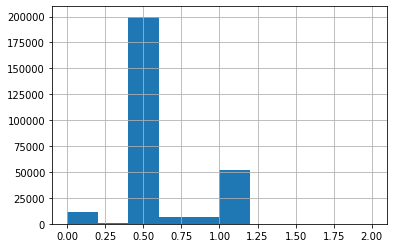

In [39]:
df.helpful_score.hist()

__comment__ : looks like there are helpful socres exceeding 1.0, which is invalid and should be removed

In [42]:
df[df.helpful_score > 1]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,year,month,day,dow,word_count,num_helpful,total_votes,helpful_score
30730,B000JD2614,"[4, 2]",5,I have been waiting for these to go on sale fo...,2009-02-17,A353U0L2HAMSHV,"Cricket ""Living life and loving it!""",A gift for me!,1234828800,2009,2,17,1,102,4.0,2.0,2.0


In [43]:
df = df[df.helpful_score <= 1]

In [44]:
df.shape

(278652, 17)

In [46]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'year', 'month', 'day',
       'dow', 'word_count', 'num_helpful', 'total_votes', 'helpful_score'],
      dtype='object')

In [132]:
df_review = df[['reviewTime', 'num_helpful', 'total_votes', 'helpful_score', 'overall', 'word_count', 
                'summary', 'reviewText', 'reviewerID', 'reviewerName',   'year', 'month', 'day', 'dow']]

## 3. Exploratory Data Analysis

In [133]:
pd.set_option('display.max_colwidth', -1)

In [134]:
df_review.head(3)

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow
0,2011-02-12,0.0,0.0,0.5,5,35,Great tutu- not cheaply made,This is a great tutu and at a really great price. It doesn't look cheap at all. I'm so glad I looked on Amazon and found such an affordable tutu that isn't made poorly. A++,A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",2011,2,12,5
1,2013-01-19,0.0,0.0,0.5,5,61,Very Cute!!,"I bought this for my 4 yr old daughter for dance class, she wore it today for the first time and the teacher thought it was adorable. I bought this to go with a light blue long sleeve leotard and was happy the colors matched up great. Price was very good too since some of these go for over $15.00 dollars.",A2G5TCU2WDFZ65,Amazon Customer,2013,1,19,5
2,2013-01-04,0.0,0.0,0.5,5,62,I have buy more than one,"What can I say... my daughters have it in orange, black, white and pink and I am thinking to buy for they the fuccia one. It is a very good way for exalt a dancer outfit: great colors, comfortable, looks great, easy to wear, durables and little girls love it. I think it is a great buy for costumer and play too.",A1RLQXYNCMWRWN,Carola,2013,1,4,4


In [135]:
df_review[df_review.helpful_score > 0.5].head(3)

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow
9,2012-10-07,7.0,8.0,0.875,5,100,WOW !! ..is all I have to say!,For what I paid for two tutus is unbeatable anywhere! I ordered a pink and turquios and they are vibrant and beautiful! The tutu is very full! Princess style! Not cheaply made! Not cheap materia! Obviously someone made these with love and care! I paid less than 7 bucks for a tutu I and I feel proud of my self for researching to the point of finding gold!Recommend 2-6 years!My daughter is two ! Wears size 4t and this skirt ( one size ) fit perfect and will probaly be able to accommodate her quickly growing waist for some time!,A3EERSWHAI6SO,"Jeffrey Hollingshead ""Jillian hollingshead""",2012,10,7,6
13,2013-02-24,1.0,1.0,1.000,5,25,Great Tutu,Full and well stitched. This tutu is a beautiful purple color that looks just like the picture. It looks just adorable on our little fairy.,A34ATJR9KFIXL9,Maudy1,2013,2,24,6
23,2013-11-07,1.0,1.0,1.000,5,86,Breathtaking 5 Stars,"The minute I saw this my heart skipped a beat. What a nice case to sort my collection. I love all the compartments and the layout too. You will love this color too. If this is a gift do not hesitate. It will please even the most fussy, as I am. The price is fair if you check around as I did. Seems well made too. It is suitable for an adult though. Not meant as a toy. This is for serious jewelry lover's. Buy it.....",A2WNN1DQVL4LH5,Caddycat,2013,11,7,3


### check for duplicate reviews

In [136]:
df_review.nunique()

reviewTime       2691  
num_helpful      202   
total_votes      209   
helpful_score    576   
overall          5     
word_count       798   
summary          179816
reviewText       278524
reviewerID       39387 
reviewerName     34444 
year             12    
month            12    
day              31    
dow              7     
dtype: int64

In [137]:
df_review.shape, df_review.shape[0]

((278652, 14), 278652)

In [138]:
df_review[df_review.reviewText.duplicated()]

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow
4490,2014-07-01,0.0,0.0,0.5,5,1,Five Stars,Good,A3FRIOMSJMGIBB,Kevin Silence,2014,7,1,1
9066,2014-07-06,0.0,0.0,0.5,5,1,Five Stars,Good,A3MEH8YCY957EC,brdlv771,2014,7,6,6
11952,2014-07-07,0.0,0.0,0.5,4,2,Four Stars,Great fit,A12BP7RIRXKR8O,Lynette Parker,2014,7,7,0
13884,2014-07-08,0.0,0.0,0.5,5,2,very good,very good,AZWKE41O3HYKM,Jose A Fuentes,2014,7,8,1
14900,2014-07-10,0.0,0.0,0.5,5,1,Five Stars,great,A3PU4D7YKP5KWG,R. Kincade,2014,7,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276313,2014-07-15,0.0,0.0,0.5,5,2,very nice,love it,A1SV3QGXJN9WGM,sankirk,2014,7,15,1
276558,2014-07-10,0.0,0.0,0.5,4,1,Four Stars,sexy,A10QLQNWJ8Q9FW,carol l kimble,2014,7,10,3
277028,2014-07-12,0.0,0.0,0.5,5,2,Five Stars,Love it,A1A2DD91BWGCWE,keisha conley,2014,7,12,5
278110,2014-07-02,2.0,2.0,1.0,4,2,Four Stars,too small,AELATFZKFKLNY,rosalinda,2014,7,2,2


plt.style.use('seaborn-white')
df_review[df_review.reviewText.duplicated()].word_count.hist();
plt.title('')

__comment:__ it's interesting to see there are so many reviews with duplicate review texts. The shorter ones are probably valid, so let´s focus on ones where the text is longer than 10 words

In [140]:
df_review[(df_review.word_count > 10) & (df_review.reviewText.duplicated(keep=False))].sort_values(by =['reviewText', 'reviewTime'] )

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow
101585,2011-03-20,12.0,12.0,1.000000,4,36,Watch is stylish,"Has great style, however, I had to pay $10 for a jewler to take out several links. This watch has a large band..fine if you want to wear it bracelet style and have it flop around.",A2JIDRETQ88QUB,Runner Girl,2011,3,20,6
101579,2013-05-27,0.0,0.0,0.500000,5,36,Very good,"Has great style, however, I had to pay $10 for a jewler to take out several links. This watch has a large band..fine if you want to wear it bracelet style and have it flop around.",AV2QEVD6YF42H,Hernany,2013,5,27,0
196107,2013-01-24,0.0,0.0,0.500000,5,21,Silky,"I just love this little cardigan type thing. The animal print is bold, the jacket is light, and I'm very satisfied!",A1SNWL5149BR45,Catherine,2013,1,24,3
196111,2013-01-29,0.0,0.0,0.500000,5,21,Good,"I just love this little cardigan type thing. The animal print is bold, the jacket is light, and I'm very satisfied!",A26JSPI89JGHCH,fahad alenazy,2013,1,29,1
56626,2009-11-26,2.0,6.0,0.333333,3,57,Wig Head,"I used this under a wig I wore to keep fleas off of my bald head. It gets hot and eventually ripped so I had to use a woman's pantyhose. If you are really in a bind, you can even use material from your underpants, make sure it's breathable.Styrofoam MODEL HEAD ~ HAT Wig DISPLAY Mannequin Foam",AI0NMYA3LKXW1,"Bartok Kinski ""A casual stroll through the lu...",2009,11,26,3
56625,2013-11-20,0.0,0.0,0.500000,3,57,Wig Head,"I used this under a wig I wore to keep fleas off of my bald head. It gets hot and eventually ripped so I had to use a woman's pantyhose. If you are really in a bind, you can even use material from your underpants, make sure it's breathable.Styrofoam MODEL HEAD ~ HAT Wig DISPLAY Mannequin Foam",A3L61G6N7AT8N2,"Bartok Kinski ""A casual stroll through the lu...",2013,11,20,2
140501,2011-10-08,13.0,14.0,0.928571,5,35,Better than expected!!!,I was really shocked that this costume was exactly as pictured. So many times Ive ordered costumes and they looked nothing like they were pictured to. The costume fits very good and is great quality.,A2UJ651ABZP41G,Jlynn,2011,10,8,5
140505,2013-11-13,0.0,0.0,0.500000,4,35,GREAT Costume for the money!,I was really shocked that this costume was exactly as pictured. So many times Ive ordered costumes and they looked nothing like they were pictured to. The costume fits very good and is great quality.,AR6JRO559GXIK,sj,2013,11,13,2
238546,2013-08-29,1.0,1.0,1.000000,5,23,Play set,Oh how cute are these with the little kitties on them. So soft and she will have fun sleeping and playing in these.,AQOD4R6GX9TFD,messnroun,2013,8,29,3
186751,2014-04-01,0.0,0.0,0.500000,5,23,nice,Oh how cute are these with the little kitties on them. So soft and she will have fun sleeping and playing in these.,A1PULJU98V5M2L,thani,2014,4,1,1


__comment:__ let's keep the first occurrence of the reviews and remove the duplicates where the text is longer than 10 words. It would be interesting to investigate more about the cause of duplicates, perhaps some people are actively creating fake reviews.

In [142]:
df_review.shape, df_review[(df_review.word_count > 10)].shape

((278652, 14), (276209, 14))

In [143]:
df_review = pd.concat([df_review[(df_review.word_count <= 10)], df_review[(df_review.word_count > 10)].drop_duplicates(subset='reviewText', keep="first")])

In [144]:
df_review.shape

(278643, 14)

### check distribution of total votes

Let's consider two scenarios for reviews without any votes on helpfulness. We had given those a helpful score of 0.5, but since there are quite a lot of them, we can also consider an alternate scenario by removing them from the dataset

In [146]:
# create a separate dataset where the reviews without any "total_votes" are removed

df_review_helpful = df_review[df_review.total_votes > 0]

In [266]:
len(df_review), len(df_review_helpful),  len(df_review_helpful) / len(df_review)

(278643, 86996, 0.31221311857825246)

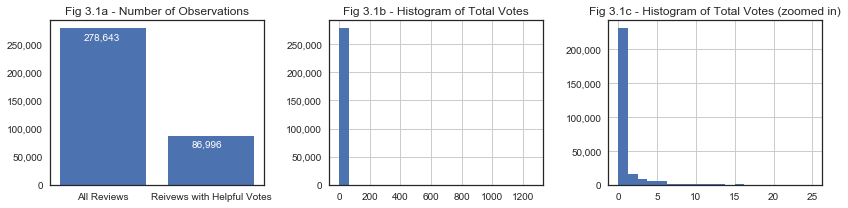

In [301]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(12, 3))
ax = plt.subplot(1,3, 1)   
#ax = fig.add_axes([0,0,1,1])
type = ['All Reviews', 'Reivews with Helpful Votes']
counts = [len(df_review), len(df_review_helpful)]
ax.bar(type,counts)
for i, v in enumerate(counts):
    ax.text(i - .18, v - 20000, str(format(int(v), ',')), color='white')#, fontweight='bold')
ax.set_title('Fig 3.1a - Number of Observations')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#len(df_review_helpful)

ax2 = plt.subplot(1,3, 2)   
df_review.total_votes.hist(bins=20)
ax2.set_title('Fig 3.1b - Histogram of Total Votes')
ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3 = plt.subplot(1,3,3)   
df_review.total_votes.hist(bins=20, range=(0, 25))
ax3.set_title('Fig 3.1c - Histogram of Total Votes (zoomed in)')
ax3.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

In [297]:
len(df_review[df_review.total_votes > 0]),  len(df_review[df_review.total_votes >= 5]), len(df_review[df_review.total_votes >= 5]) / len(df_review[df_review.total_votes > 0])

(86996, 17343, 0.19935399328704767)

__comment__: Only 31.2% of reviews have an accurate helpfulness score where users voted on the helpfulness of the review. Of those, only about 20% have a total count of 5 or more.

### check distribution of helpful score of the reviews

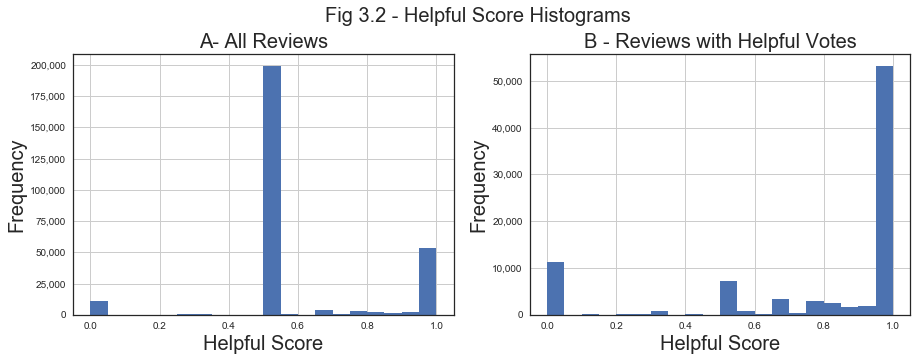

In [325]:

fig = plt.figure(figsize=(15, 5))
plt.style.use('seaborn-white')
plt.subplots_adjust(top=0.85)
fig.suptitle('Fig 3.2 - Helpful Score Histograms', fontsize=20)

ax1 = plt.subplot(1,2, 1)   
df_review.helpful_score.hist(bins=20, ax=ax1)
ax1.set_title('A- All Reviews', size=20)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel("Helpful Score", size=20)
plt.ylabel("Frequency", size=20)

ax2 = plt.subplot(1,2,2)   
df_review_helpful.helpful_score.hist(bins=20, ax=ax2)
ax2.set_title('B - Reviews with Helpful Votes', size=20)
ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel("Helpful Score", size=20)
plt.ylabel("Frequency", size=20)

#plt.tight_layout()
plt.show()

__comment:__ Subplot B shows the distribution of Helpful Score when records without votes are filtered out. It is apparent that generally more reviews have helpful score greater than 0.5. This might suggest people are more likely to vote when the review is helpful than otherwise.

### check correlation between rating and helpfulness of review

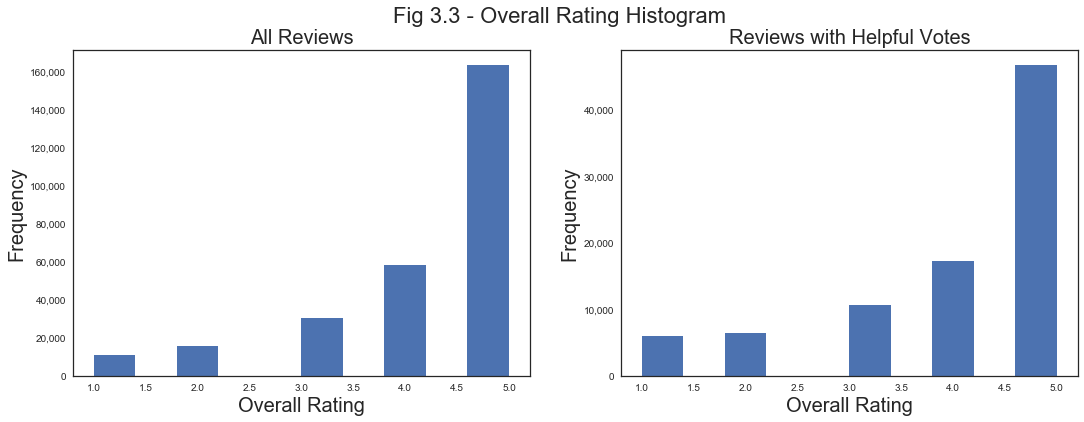

In [299]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18, 6))
fig.suptitle('Fig 3.3 - Overall Rating Histogram', fontsize=22)

ax1 = plt.subplot(1,2, 1)    
ax1.set_title("All Reviews", size=20)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
df_review.overall.plot.hist(ax=ax1)
plt.xlabel("Overall Rating", size=20)
plt.ylabel("Frequency", size=20)

ax2 = plt.subplot(1,2, 2) 
ax2.set_title("Reviews with Helpful Votes", size=20)
ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
df_review_helpful.overall.plot.hist(ax=ax2)
plt.xlabel("Overall Rating", size=20)
plt.ylabel("Frequency", size=20)

plt.show()

__comment:__ Both datasets have a similar distributionn of overall ratings, where there are more reviews with higher ratings

In [329]:
df_review.groupby('overall').helpful_score.agg(['mean'])

,mean
overall,
1,0.570462
2,0.571319
3,0.573863
4,0.587846
5,0.592479


In [330]:
df_review_helpful.groupby('overall').helpful_score.agg(['mean'])

,mean
overall,
1,0.631554
2,0.671823
3,0.710656
4,0.796357
5,0.823760


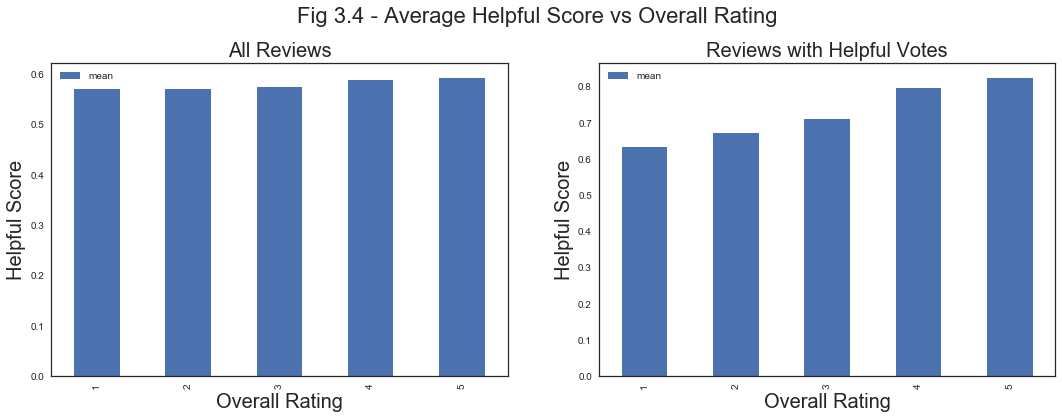

In [323]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18, 6))
plt.subplots_adjust(top=0.85)
fig.suptitle('Fig 3.4 - Average Helpful Score vs Overall Rating', fontsize=22)

ax1 = plt.subplot(1,2, 1)    
ax1.set_title("All Reviews", size=20)
df_review.groupby('overall').helpful_score.agg(['mean']).plot(kind="bar", ax=ax1)
plt.xlabel("Overall Rating", size=20)
plt.ylabel("Helpful Score", size=20)

ax2 = plt.subplot(1,2, 2) 
ax2.set_title("Reviews with Helpful Votes", size=20)
df_review_helpful.groupby('overall').helpful_score.agg(['mean']).plot(kind="bar",ax=ax2)
plt.xlabel("Overall Rating", size=20)
plt.ylabel("Helpful Score", size=20)

plt.show()

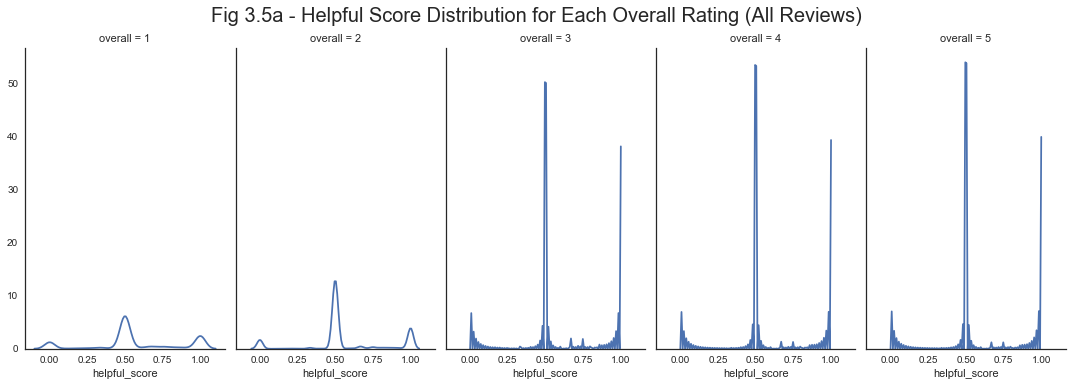

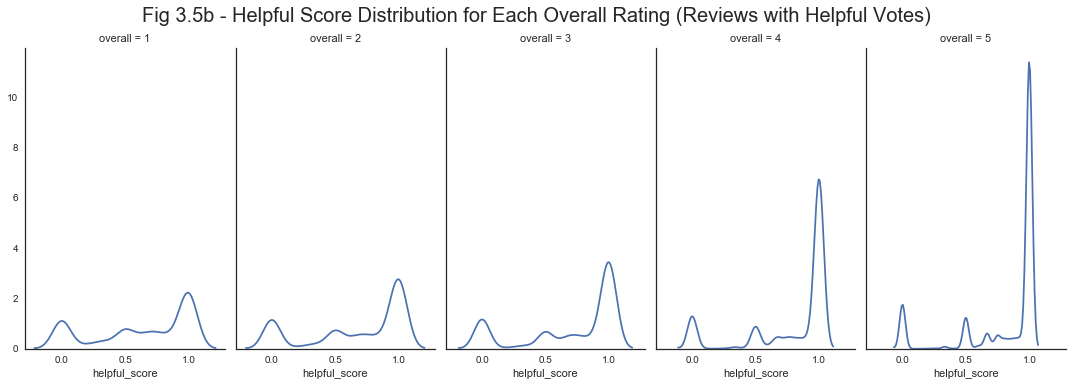

In [263]:
plt.style.use('seaborn-white')
g = sns.FacetGrid(df_review, col="overall")
g = (g.map(sns.distplot, "helpful_score",  hist=False, rug=False,kde=True, label="overall"))
g.fig.set_size_inches(15,6)
g.fig.suptitle("Fig 3.5a - Helpful Score Distribution for Each Overall Rating (All Reviews)", size=20)

g = sns.FacetGrid(df_review_helpful, col="overall")
g = (g.map(sns.distplot, "helpful_score",  hist=False, rug=False,kde=True, label="overall"))
g.fig.set_size_inches(15,6)
g.fig.suptitle("Fig 3.5b - Helpful Score Distribution for Each Overall Rating (Reviews with Helpful Votes)", size=20)

plt.show()

__comment:__ Reviews with higher ratings also tend to have a higher helpful score, as shown by Fig 3.4 and Fig 3.5. Reviews with higher ratings also have more helpful scores of 1.0 compared to 0, as shown by the proportional height of the two peaks in each of the subplots. Fig 3.5a includes reviews that did not have any votes for the helpful count (ie. total_votes = 0), and those reviews are set to 0.5. Fig 3.5b filtered out those records. Fig 3.5b provides a better representation of the trends as a result.

### who are the most frequent reviewers? ##

In [347]:
reviewer_grouped = df_review.groupby('reviewerID').helpful_score.agg(["count", "mean"])

In [359]:
reviewer_grouped.sort_values("count", ascending=False).head(10)

,count,mean
reviewerID,,
A2J4XMWKR8PPD0,136,0.575893
A2GA55P7WGHJCP,76,0.670087
A2KBV88FL48CFS,69,0.757550
AENH50GW3OKDA,68,0.576423
A2V5R832QCSOMX,62,0.719047
AVUJP7Z6BNT11,61,0.528103
A132ETQPMHQ585,60,0.525833
A2UO040HWOP0C2,59,0.559322
A2GP4EJIAA2OE0,59,0.467302


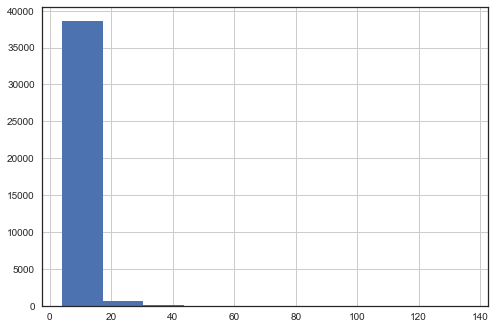

In [356]:
reviewer_grouped["count"].hist()

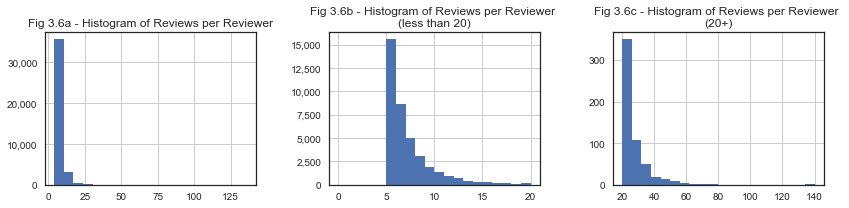

In [374]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(12, 3))

ax1 = plt.subplot(1,3, 1)   
reviewer_grouped["count"].hist(bins=20)
ax1.set_title('Fig 3.6a - Histogram of Reviews per Reviewer')
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2 = plt.subplot(1,3,2)   
reviewer_grouped["count"].hist(bins=20, range=(0, 20))
ax2.set_title('Fig 3.6b - Histogram of Reviews per Reviewer \n(less than 20)')
ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3 = plt.subplot(1,3,3)   
reviewer_grouped["count"].hist(bins=20, range=(20, 140))
ax3.set_title('Fig 3.6c - Histogram of Reviews per Reviewer \n(20+)')
ax3.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

In [375]:
len(reviewer_grouped), len(reviewer_grouped[reviewer_grouped["count"] >= 20]), len(reviewer_grouped[reviewer_grouped["count"] >= 20]) / len(reviewer_grouped)

(39387, 557, 0.014141721887932567)

__comment:__ only around 1.4% of reviewers submit 20 or more reviews

### who are the most helpful reviewers?

let's consider the most helpful reviewers as the reviewers with these criteria:
* having submitted 10 or more reviews, which are voted by 3 or more people
* having the highest helpful score

In [378]:
df_review_helpful.head(2)

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow
440,2014-07-03,1.0,1.0,1.0,5,8,Five Stars,I love these. So cute and just right,AZH1SOHEON09U,Sandy Elizabeth Donis,2014,7,3,3
2309,2007-05-13,1.0,1.0,1.0,5,7,Levi's 501 Original Fit Button Fly Jeans (Purchased on 04/11/2007),It is perfect. It fits me great.,A2DQPW08PVTYUK,Pedro A. Salcedo Quijano,2007,5,13,6


In [383]:
df_review_helpful_filtered = df_review_helpful[df_review_helpful.total_votes >= 3]
df_review_helpful_filtered.sample(2)

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow
155170,2013-05-13,6.0,6.0,1.0,5,33,Very cute and comfy!,Sized down to the 36. I normally wear a 6. Love them.....do wish that they came in half sizes! My toes come to the end of the 36 and the 37 felt big.,A16JHM565K5DIX,dalildago,2013,5,13,0
51915,2008-02-29,5.0,5.0,1.0,1,42,HORRIBLE FIT,"THIS HAS TO BE THE WORST BRA I HAVE EVER TRIED ON..IF YOU ARE ""D"" OR ""DD"", EVEN WITH A SMALL BAND, DON'T EVEN THINK ABOUT IT.NO SIDE SUPPORT, SO SUPPORT AT AT ALLWHAT WAS BALI THINKING WHEN THEY DESIGNED THIS BRA.",A3E0QQ0SCNVGR9,"Janet D. ""rock goddess""",2008,2,29,4


In [385]:
reviewer_grouped2 = df_review_helpful_filtered.groupby('reviewerID').helpful_score.agg(["count", "mean"])

In [386]:
reviewer_grouped2 = reviewer_grouped2[reviewer_grouped2["count"]>=10]

In [387]:
len(reviewer_grouped2)

63

In [388]:
reviewer_grouped2.sort_values("mean", ascending=False).head(10)

,count,mean
reviewerID,,
A1SHHVI4JVXL9Z,12,1.000000
A34BZM6S9L7QI4,16,0.974737
AWBGHDHH7E51F,28,0.965258
A34GM17T6WTJDK,10,0.958000
AYY1J504F3A1L,10,0.954616
A265PCQZA1Y1WF,10,0.953193
A3A90CELVLOUP6,12,0.952349
AKMEY1BSHSDG7,11,0.950696
AOINAOO0NQRGN,11,0.943258


__comment:__ The table above shows a list of users who are the most helpful by considering only reviews that are voted by a minimum of 3 users and each of the reviewers have submitted at least 10 reviews. Let's look at the top user and see if we can identify any characteristics

In [390]:
len(df_review[df_review.reviewerID == "A1SHHVI4JVXL9Z"])

21

In [395]:
df_review[(df_review.reviewerID == "A1SHHVI4JVXL9Z") & (df_review.total_votes >=3)].head(3)

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow
41533,2013-04-18,3.0,3.0,1.0,5,59,'boot' socks,I'm a girl with a size 10.5 foot and I got these to wear with my cowboy boots. It's been pretty difficult to find something comfortable to wear with them but these are absolutely perfect! The cushy material keeps my ankles and heel completely safe from blisters and pain. I can walk in my boots for hours with these.,A1SHHVI4JVXL9Z,Kristina Lynn,2013,4,18,3
56262,2012-02-03,44.0,44.0,1.0,5,602,"Excellent, sturdy, all-purpose boot","I'm minimalizing everything in my life and I've hit my wardrobe recently. Going over my expenses, I realized that I've spent 70.00 to 90.00 a year for winter boots... that only last one year. I wore Docs when I was in college and have known people who've owned their pair for ten years or more. I'm hoping these last at least half that (I worry about the zipper a little, but the originals are really hard to come by from reputable sellers).So far, I've very, very pleased. The boots are as sturdy and well-made as I remember and the leather seems much softer. I do recommend replacing the insoles with something a little softer. I use a thin pair of memory foam sport insoles and, combined with the Dr Marten 'Bounce,' it's like walking on air. The zipper and all the stitching are very nicely done; clean and strong. I wear them with dresses and skirts with tights or leggings. The rest of my wardrobe is pretty bohemian so these really 'pop.' They're a bit odd, but they don't break any rules; even in my corporate casual office. I've gotten quite a few compliments on them!I'm sort of startled by all the reports of people who have to spend a year breaking these in. I conditioned mine, put them on, and wore them for 14 hours, walking about three miles on the first day. I do not have a blister anywhere on my foot.I urge everyone to Get The Proper Size! Underline that and put in bold, please: Get. The. Proper. Size. These boots shouldn't ever hurt when you put them on - if they do, they are too small or they've been laced incorrectly.When you put the boots on, your toes should never touch the front of the shoe. There shouldn't be any pressure on your heel, either. If there is a little pressure on the sides of your foot, this is okay as they will strech in width (but they will NEVER stretch in length).The laces should be the tightest along the front, bottom half of your calf - this is going to keep them in place and keep your heel from sliding around inside the boot. The laces across the top of your foot should be snug, but comfortable. At the very top of the shaft, the laces should be a little less snug as your calf muscles need to flex. You can actually cause the boots to get pushed down your leg if you do them up too tightly at the top.You're going to have to lace and re-lace these boots quite a few times when you first get them - be prepared for that and don't get frustrated. Once you've got them properly laced, you can use the zipper for ever more (or at least until they stretch too much or you lose or gain weight).Wear GOOD socks. I highly recommend sport socks - the kind with a little padding on the sole. Also, knee high or thigh high, thick cotton and wool socks are great as well.Flex, flex, flex! Crouch a few times, kneel in them and get back up, bend your toes back, and rub conditioner into the leather WHILE you're wear the boots. This will help soften them to the shape of your foot. Feeding the leather some mink oil is excellent as well.Please don't listen when people tell you Docs always hurt - they really shouldn't. No shoe should hurt, even when you first get it. If it does, it's not fitted correctly.I highly recommend these boots... in the proper size, of course!",A1SHHVI4JVXL9Z,Kristina Lynn,2012,2,3,4
66794,2012-11-30,6.0,6.0,1.0,2,60,"Well made, but too long","The woman in the photo must be seven feet tall. I'm 5'6"" and this

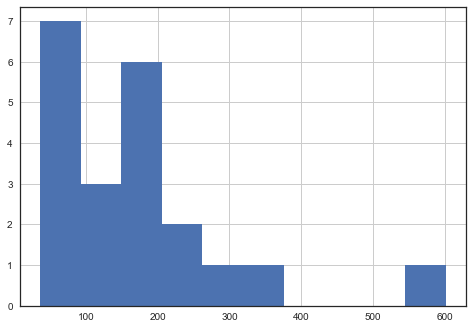

In [396]:
df_review[(df_review.reviewerID == "A1SHHVI4JVXL9Z")].word_count.hist()

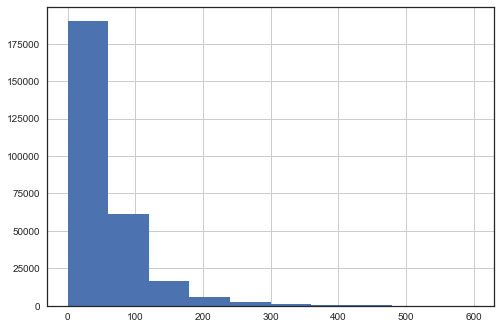

In [398]:
df_review.word_count.hist(range=(0,600))

In [400]:
df_review[(df_review.reviewerID == "A1SHHVI4JVXL9Z")].word_count.mean(), df_review.word_count.mean()

(172.1904761904762, 59.95835531486526)

In [402]:
df_review_helpful[(df_review_helpful.reviewerID == "A1SHHVI4JVXL9Z")].overall.mean(), df_review_helpful.overall.mean()

(3.625, 4.059071681456619)

__comment:__ The above user appear to write reviews that are longer than average, and gives a overall rating that is lower than average. 

In [478]:
### looking at least helpful reviewers

In [475]:
reviewer_grouped2.sort_values("mean", ascending=False).tail(10)

,count,mean
reviewerID,,
A1WE8KTC20NY65,10,0.748571
A5QQRB2QOY96U,10,0.742383
A2SH7OWE8QJYNC,14,0.735941
A2J4XMWKR8PPD0,12,0.735119
A3E0QQ0SCNVGR9,10,0.725000
A334IB2XLPKQ6U,11,0.690293
A3W4D8XOGLWUN5,20,0.606269
A2OMZ8QPFZQBO4,13,0.517766
A2VALCFTOWFYXZ,10,0.420635


In [477]:
df_review[(df_review.reviewerID == "A3FYG5ADFGIYSB") & (df_review.total_votes >=3)].tail(3)

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow,reviewYearMonth,word_count_binned
176698,2012-12-25,14.0,43.0,0.325581,1,130,I can break your zipper,"Sorry to tell you this. With a pen or awl I can push Samsonite's zipper teeth apart and open your whole bag. Then I can reclose your bag with the zipper pulls, and you would never know how your things disappeared. I am now trying to return two brand new Samsonite bags to the manufacturer for a full refund after Ebags.com sez I am past the 2-month refund time. Samsonites are beautiful bags or so I though until the zipper test failed. My Eagle Creek duffel bag zippers cannot be broken into so now I want to replace all bags after EC replies to me whether all their luggage come with the same indestructible zippers. All of you should google how to break into luggage with a pen. Interesting eye-openers.",A3FYG5ADFGIYSB,"George Pill ""Golden Rule""",2012,12,25,1,2012-12,140
185936,2013-02-05,2.0,8.0,0.250000,5,129,This is the ONE you want,"Google OPEN LUGGAGE PEN and watch the YouTube video how a thief can break into you zippered luggage by spreading the teeth apart then closing it by pulling the zipper tab over it. You would never know. Maybe you thought you forgot something at the hotel. This Cruisair luggage has NO zippers. Samsonite should stop making all zippered luggage and get into this kind of bag. Or make a foolproof zipper. I bought the 22' carry on bag and use it as my hotel safe in hotels. Don't trust reception safes. It has been written that Bangkok hotels ""borrow"" your CC and you don't know it until you return home. Stinkers!For added security, get Amazon's Pacsafe TravelSafe steel mesh bags. Get all three sizes and get peace of mind.",A3FYG5ADFGIYSB,"George Pill ""Golden Rule""",2013,2,5,1,2013-02,140
194774,2013-01-11,4.0,31.0,0.129032,1,28,Hate zippers,Google OPEN LUGGAGE PEN and watch the YouTube video. Maybe that's why I thought I did pack certain things in my baag only to later find them missing.,A3FYG5ADFGIYSB,"George Pill ""Golden Rule""",2013,1,11,4,2013-01,40


### have reviews been getting more or less helpful over time?

In [405]:
df_review_helpful["reviewYearMonth"] = df_review_helpful['reviewTime'].dt.to_period('M')

C:\Users\Susan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [406]:
df_review["reviewYearMonth"] = df_review['reviewTime'].dt.to_period('M')

In [407]:
df_review.head()

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow,reviewYearMonth
325,2014-07-10,0.0,0.0,0.5,4,2,Four Stars,Excellent quality.,A2HECBMYK2UUO8,ymabaric,2014,7,10,3,2014-07
440,2014-07-03,1.0,1.0,1.0,5,8,Five Stars,I love these. So cute and just right,AZH1SOHEON09U,Sandy Elizabeth Donis,2014,7,3,3,2014-07
781,2014-07-10,0.0,0.0,0.5,5,2,Five Stars,Best minimizer,A3N1CQV9LJ3PWQ,Amazon Customer,2014,7,10,3,2014-07
831,2014-07-07,0.0,0.0,0.5,5,2,Five Stars,Great fit,A3OAFAJFR5K0U5,Maria G Davalos,2014,7,7,0,2014-07
833,2014-07-12,0.0,0.0,0.5,5,7,Five Stars,"soft, attractive, and I will purchase again.",A39U6NKMGDLNNB,Maurine H.,2014,7,12,5,2014-07


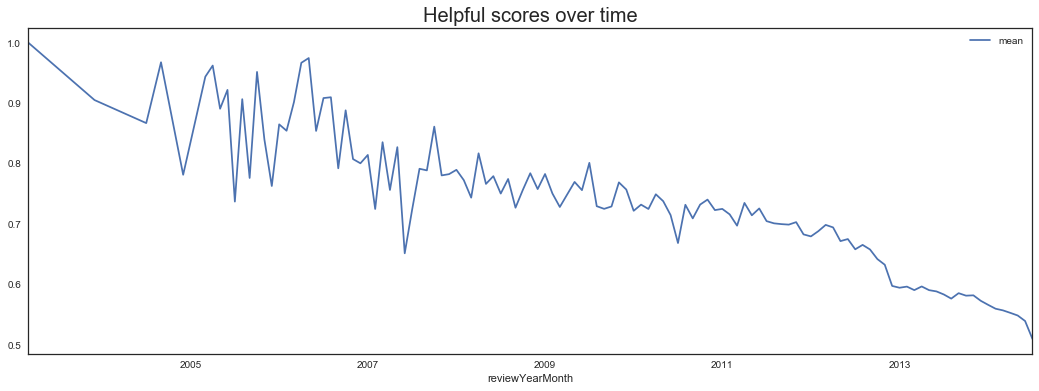

In [418]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1,1, 1)  
ax1.set_title('Helpful scores over time', size=20)
df_review_date=df_review.groupby('reviewYearMonth').agg(['mean']).reset_index()
df_review_date.plot(x='reviewYearMonth', y='helpful_score', kind="line", ax=ax1)
plt.show()

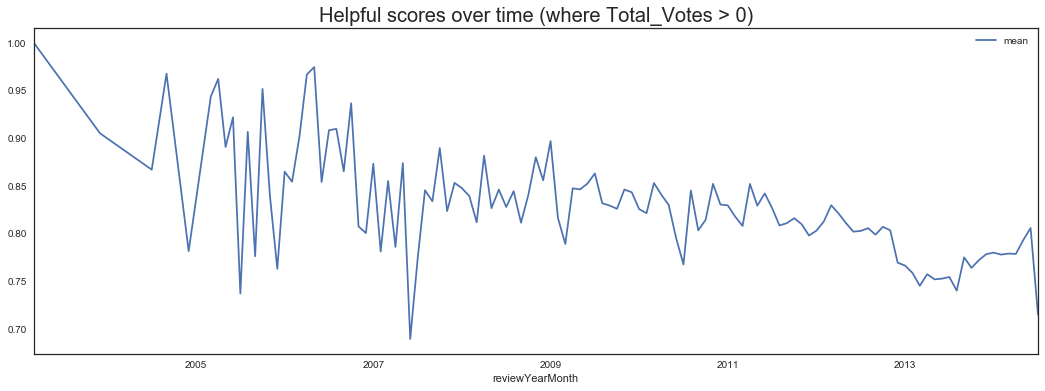

In [428]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1,1, 1)  
ax1.set_title('Helpful scores over time (where Total_Votes > 0)', size=20)
df_review_date_helpful=df_review_helpful.groupby('reviewYearMonth').agg(['mean']).reset_index()
df_review_date_helpful.plot(x='reviewYearMonth', y='helpful_score', kind="line", ax=ax1)
plt.show()

__comment:__ Looks like the helpful scores for reviews have decreased over time

Let´s also check the number of votes over time

In [422]:
df_review.groupby('reviewYearMonth').head()

,reviewTime,num_helpful,total_votes,helpful_score,overall,word_count,summary,reviewText,reviewerID,reviewerName,year,month,day,dow,reviewYearMonth
325,2014-07-10,0.0,0.0,0.500000,4,2,Four Stars,Excellent quality.,A2HECBMYK2UUO8,ymabaric,2014,7,10,3,2014-07
440,2014-07-03,1.0,1.0,1.000000,5,8,Five Stars,I love these. So cute and just right,AZH1SOHEON09U,Sandy Elizabeth Donis,2014,7,3,3,2014-07
781,2014-07-10,0.0,0.0,0.500000,5,2,Five Stars,Best minimizer,A3N1CQV9LJ3PWQ,Amazon Customer,2014,7,10,3,2014-07
831,2014-07-07,0.0,0.0,0.500000,5,2,Five Stars,Great fit,A3OAFAJFR5K0U5,Maria G Davalos,2014,7,7,0,2014-07
833,2014-07-12,0.0,0.0,0.500000,5,7,Five Stars,"soft, attractive, and I will purchase again.",A39U6NKMGDLNNB,Maurine H.,2014,7,12,5,2014-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23253,2005-10-28,63.0,66.0,0.954545,4,289,A superb casual watch,"The basic Luminox watch is a superb day watch. Although I am on my second one in eight years, this may be a record, as I am not gentle with watchs. The first one's crystal cracked, but the second one is driving on like a champ.Pro's-The luminous stuff on the hands and face (tritium vials) is bright. I mean really, REALLY bright. None of this hold it under a light"" silliness, but wake up at three thirty in the morning and have no trouble reading it.The twelve o'clock tritium vial is orange not green, acting as an index point even in complete darkness. See remark about 0330 hrs.The bezel can be turned reasonably easily, but won't turn by itself when you are not looking.Accuracy is good.Shock resistance, overall durability is very good (damage to my first watch was purely my fault and exceeded any reasonable expectation of survival).Con'sThe Navy SEAL propaganda can be mildly annoying.The bezel is synthetic (plastic), and after two or three years of use starts to go smooth and the numbers start to wear off.The luminous stuff on the hands and face (tritium vials) is bright. I mean really, REALLY bright. This con is a special case. If a service member wants to wear this watch in the field, one of those watchbands with the flap to cover the face is a REALLY good idea.The synthetic strap isn't so good. I replace the watch band with a nylon/velcro one on the first day.The little compass that comes with it is a wasted effort, get a Suunto watchband compass. Same size, superior in every way.On the whole, a tremendous value for money, and when I abuse my current one beyond usefulness, I will certainly get another one.",A1CHOKV10NEI8X,"E. M. Van Court ""Van""",2005,10,28,4,2005-10
26194,2005-07-05,37.0,38.0,0.973684,5,81,"great watch, great price, but not 'blue'","My husband likes everything about this watch except the color. When I ordered it, I thought it would have a blue face. It actually has a sort of subdued lavender face (my husband called it purple, but it is not that shocking), which is also very nice, but he would have felt more comfortable if it had a blue face. He is wearing the watch none-the-less. I don't know why the Amazon watch description says ""blue dial"", if it really isn't.",A4NDKOP0JQPF2,Lucy the Bargain Hunter,2005,7,5,1,2005-07
26341,2006-05-10,10.0,10.0,1.000000,5,171,Just picked one up,"I just bought one of these watches. It is a nice watch and feels solid and is well-built. The rubber-type strap is decent and I can't see anything bad in it. I like all the functions on this watch (date, alarm, chronograph, diver bezel, etc., etc.). Has it all. The metal base or housing piece is solid too. All-in-all a nice, solid watch (you can't of course tell from the web site how heavy the watch is, but it feels more solid than the image might suggest, and to me feels similar to my $ 250 Casio dive watch, albeit a not quite as heavy. In other words: perfect for summer, when you want something a bit lighter on your wrist. One thing I noticed is how BRIGHT it is in the dark. I pulled into the parking garage and literally said, ""Wow !"" out loud the first tim

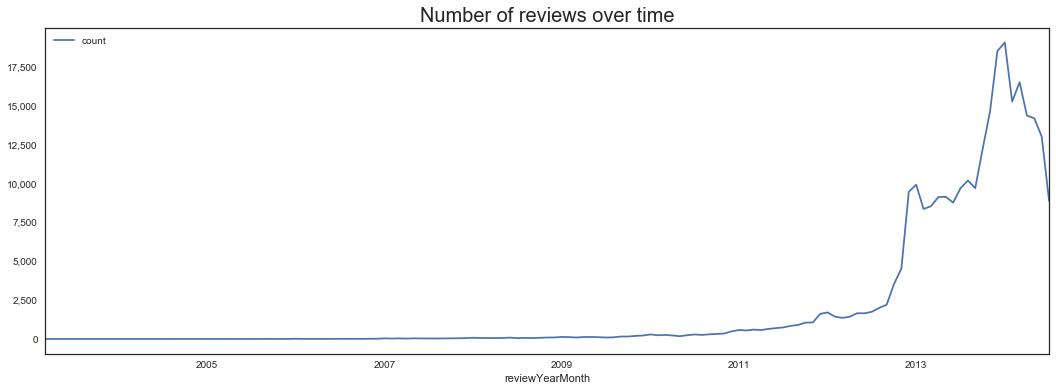

In [429]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1,1, 1)  
ax1.set_title('Number of reviews over time', size=20)
#df_review['reviewYearMonth'].hist()
df_review_date_helpful=df_review.groupby('reviewYearMonth').agg(['count']).reset_index()
df_review_date_helpful.plot(x='reviewYearMonth', y='helpful_score', kind="line", ax=ax1)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

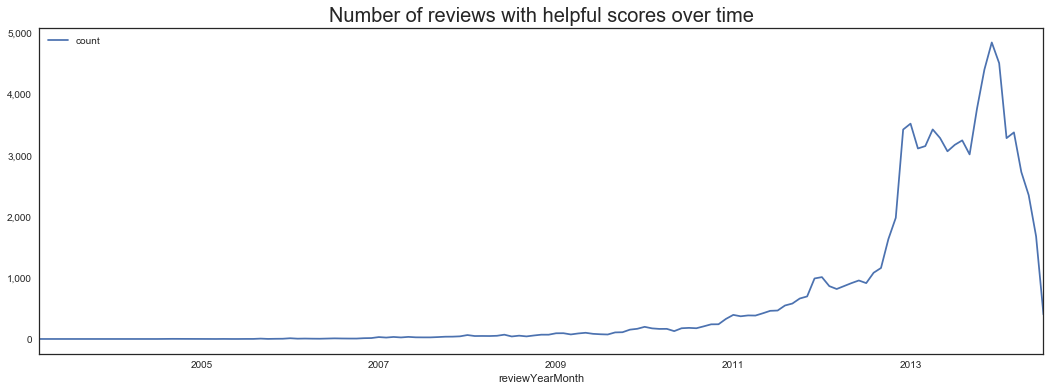

In [430]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1,1, 1)  
ax1.set_title('Number of reviews with helpful scores over time', size=20)
df_review_date_helpful=df_review_helpful.groupby('reviewYearMonth').agg(['count']).reset_index()
df_review_date_helpful.plot(x='reviewYearMonth', y='helpful_score', kind="line", ax=ax1)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

__comment__: It´s interesting see that there are more reviews over time, but the helpful scores seem to decrease.

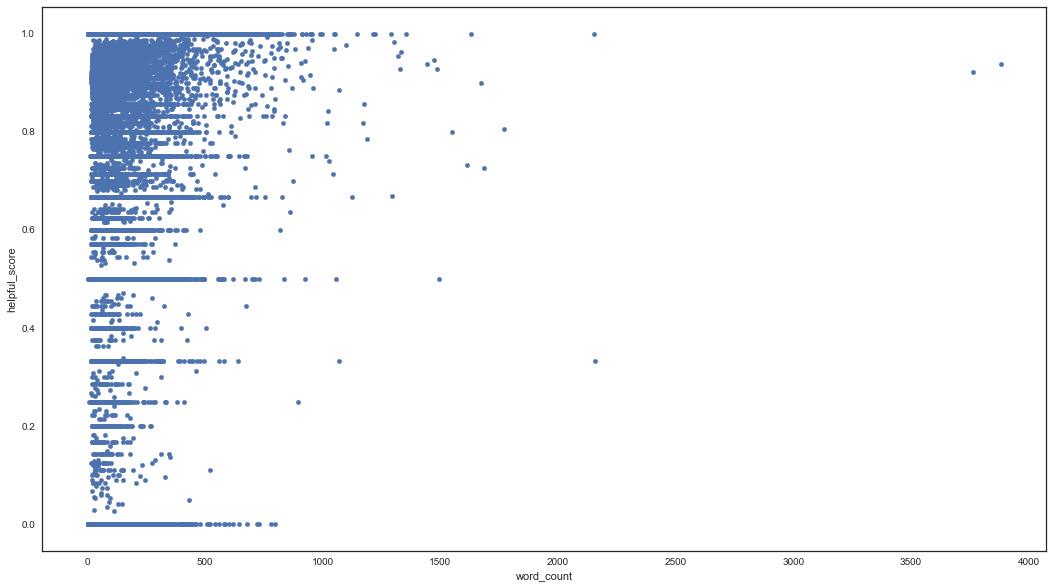

In [434]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18, 10))
ax1 = plt.subplot(1,1, 1)  
df_review_helpful.plot.scatter(x='word_count', y='helpful_score', ax=ax1);

In [436]:
df_review_helpful.word_count.min(), df_review_helpful.word_count.mean(), df_review_helpful.word_count.max()

(1, 79.43267506552026, 3882)

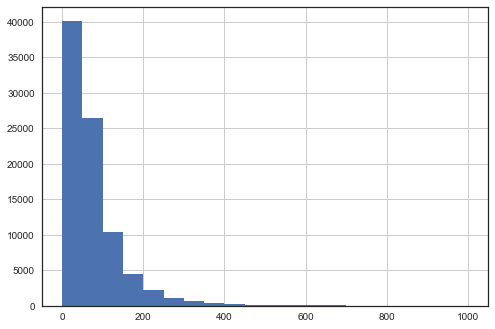

In [437]:
df_review_helpful.word_count.hist(bins=20, range=(0, 1000))

In [473]:
labels = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300, 400, 600, 800, 1000,  4000]
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300, 400,  600, 800, 1000,   4000]
df_review['word_count_binned'] = pd.cut(df_review['word_count'], bins=bins, labels= labels)


In [482]:
df_review_helpful['word_count_binned'].value_counts()

40      28517
60      16558
80      11163
100     7466 
120     5141 
140     3673 
300     3372 
20      3231 
160     2543 
180     1905 
200     1360 
400     1133 
600     672  
800     170  
1000    52   
4000    40   
Name: word_count_binned, dtype: int64

In [471]:
df_review_helpful[df_review_helpful.word_count > 1000].shape

(40, 17)

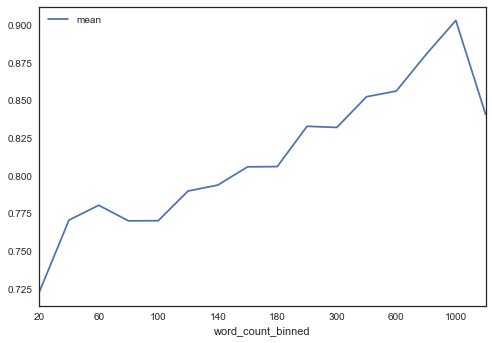

In [472]:
df_review_helpful.groupby('word_count_binned').helpful_score.agg(['mean']).plot();

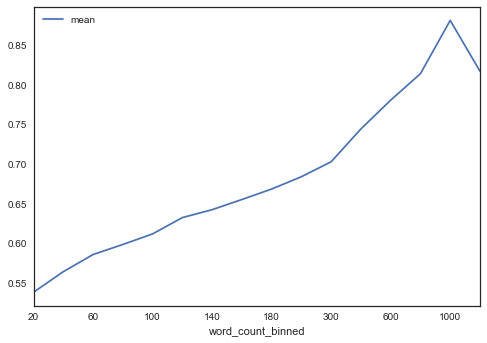

In [474]:
df_review.groupby('word_count_binned').helpful_score.agg(['mean']).plot();

In [480]:
df_review.shape

(278643, 16)